In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
d=pd.read_csv('covid19_confirmed_dataset.csv')
d.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [108]:
d.shape

(266, 104)

In [109]:
df=d.drop(columns=['Lat','Long'],axis=1,inplace=True)
d.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [111]:
corona_d_aggregate=d.groupby('Country/Region').sum()
corona_d_aggregate.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [112]:
corona_d_aggregate.shape

(187, 101)

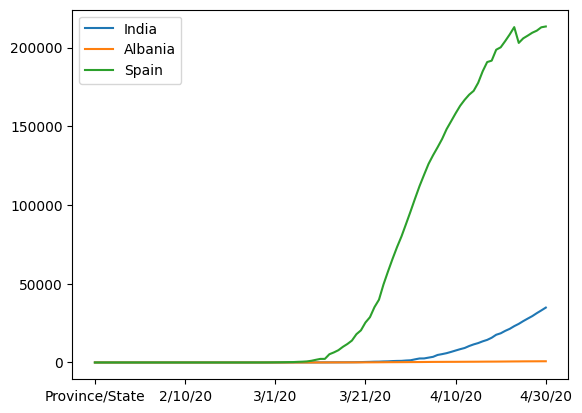

In [113]:
corona_d_aggregate.loc["India"].plot()
corona_d_aggregate.loc["Albania"].plot()
corona_d_aggregate.loc["Spain"].plot()
plt.legend()

<Axes: >

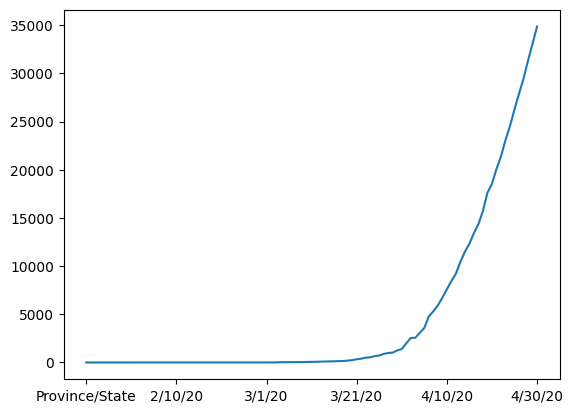

In [114]:
corona_d_aggregate.loc["India"].plot()

<Axes: >

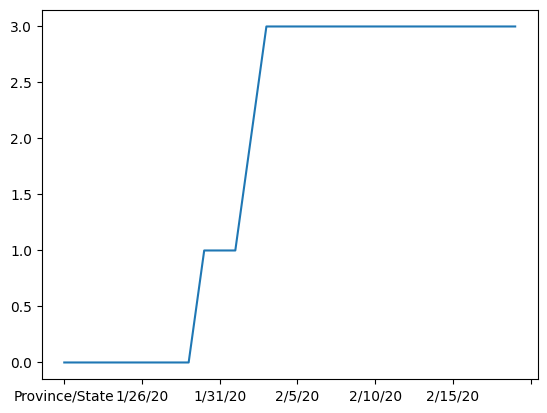

In [115]:
corona_d_aggregate.loc["India"][:30].plot()

<Axes: >

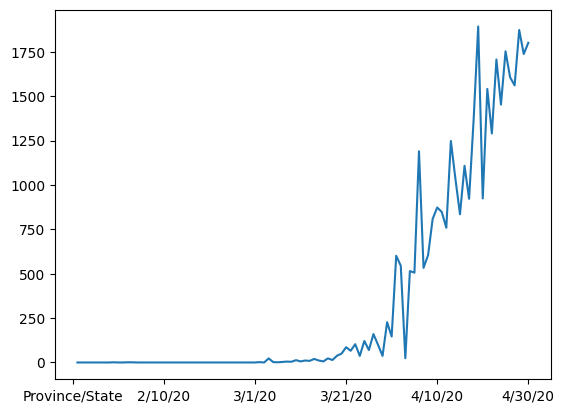

In [116]:
corona_d_aggregate.loc['India'].diff().plot()

In [117]:
corona_d_aggregate.loc['India'].diff().max()

np.int64(1893)

In [118]:
corona_d_aggregate.loc['Spain'].diff().max()

np.int64(9630)

In [119]:
countries=list(corona_d_aggregate.index)
max_inf_rates=[]
corona_d_aggregate = corona_d_aggregate.apply(pd.to_numeric, errors='coerce')
for c in countries:
    max_inf_rates.append(corona_d_aggregate.loc[c].diff().max())
corona_d_aggregate['max_inf_rates']=max_inf_rates

In [120]:
corona_d_aggregate

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_inf_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0.0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0.0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0.0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0.0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0.0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0.0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [121]:
corona_data=pd.DataFrame(corona_d_aggregate['max_inf_rates'])

In [58]:
corona_data

,max_inf_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [122]:
happiness_report=pd.read_csv('worldwide_happiness_report.csv')
happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [138]:
useless = ['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']
happiness_report.drop(useless, axis=1, inplace=True, errors='ignore')


In [124]:

happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [139]:
happiness_report.columns = happiness_report.columns.str.strip()
useless = ['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']
happiness_report.drop(columns=useless, inplace=True, errors='ignore')
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [143]:
corona_data.shape

(187, 1)

In [153]:
happiness_report.shape

(156, 5)

In [158]:
data=corona_data.join(happiness_report,how='inner')
data

,max_inf_rates,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices


In [160]:
data.corr()


,max_inf_rates,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_inf_rates,NaN,NaN,NaN,NaN,NaN,NaN
Country or region,NaN,NaN,NaN,NaN,NaN,NaN
GDP per capita,NaN,NaN,NaN,NaN,NaN,NaN
Social support,NaN,NaN,NaN,NaN,NaN,NaN
Healthy life expectancy,NaN,NaN,NaN,NaN,NaN,NaN
Freedom to make life choices,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
data

,max_inf_rates,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices


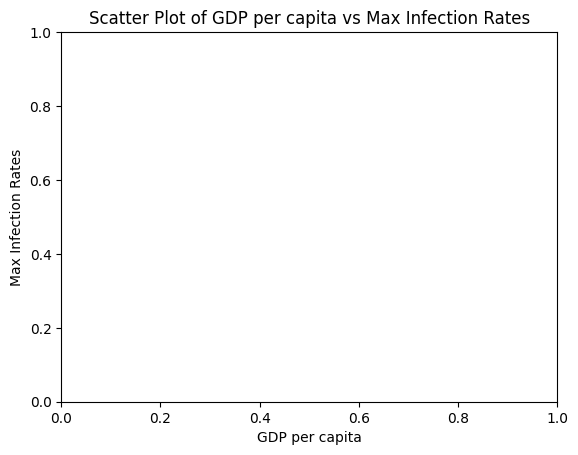

In [162]:
sns.scatterplot(x=data['GDP per capita'], y=data['max_inf_rates'])
plt.xlabel("GDP per capita")
plt.ylabel("Max Infection Rates")
plt.title("Scatter Plot of GDP per capita vs Max Infection Rates")
plt.show()

<Axes: xlabel='GDP per capita', ylabel='max_inf_rates'>

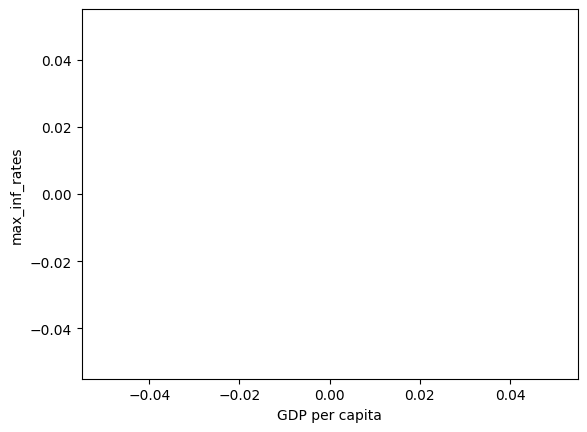

In [163]:
sns.regplot(x=data['GDP per capita'], y=data['max_inf_rates'])